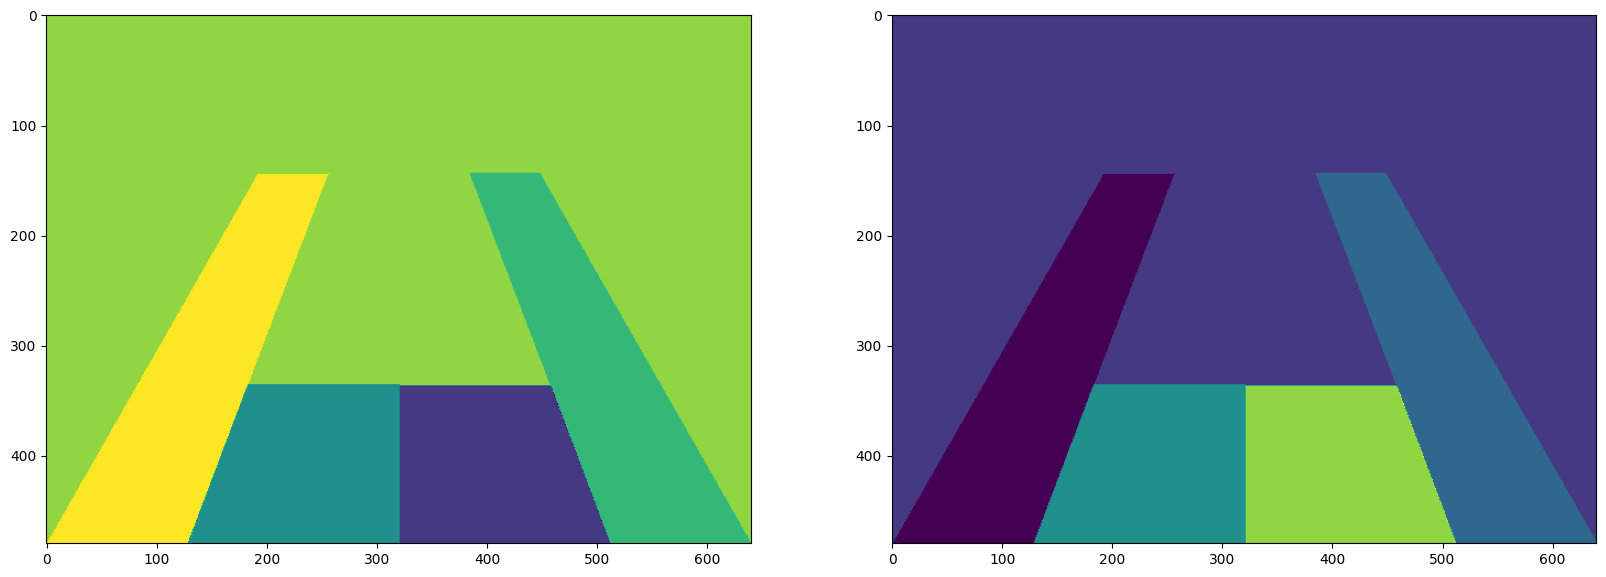

In [27]:
# import pylab as plt
import sys
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
# np.set_printoptions(threshold=np.inf)
from matplotlib.path import Path

def get_symmetry(P, W):
    Q = []
    for (x,y) in P:
        Q.append((x,W-y))
    return Q

height, width = 480,640
# height, width = 14,20

x, y = np.mgrid[:height, :width]
coors=np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) 

# Zone 1: band on left hand side
p1 = [(1.0*height, 0.*width), (0.3*height, 0.3*width), (0.3*height, 0.4*width), (1.*height, 0.2*width)]
mask1 = Path(p1).contains_points(coors) * 1
# Zone2: symmetric to zone1
p2 = get_symmetry(p1, width)
mask2 = Path(p2).contains_points(coors) * -1

# Zone 3: band on left hand side
p3 = [(1.*height, 0.2*width), (1.*height, 0.5*width), (0.7*height, 0.5*width), (0.7*height, 0.285*width)]
mask3 = Path(p3).contains_points(coors) * -2
# Zone4: symmetric to zone3
p4 = get_symmetry(p3, width)
mask4 = Path(p4).contains_points(coors) * -4

mask_Left = mask1 + mask2 + mask3 + mask4
mask_Right = mask_Left * -1

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
ax1.imshow(mask_Left.reshape(height, width), aspect = 1)
ax2.imshow(mask_Right.reshape(height, width), aspect = 1)
plt.show()


In [19]:
print(mask_Left.shape)
print(mask_Left.reshape(height, width))

(280,)
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  0  0  0  0  0  0 -1 -1  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  0  0  0  0  0  0 -1 -1  0  0  0  0]
 [ 0  0  0  0  1  1  1  0  0  0  0  0  0  0 -1 -1 -1  0  0  0]
 [ 0  0  0  0  1  1  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0]
 [ 0  0  0  1  1  1  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0]
 [ 0  0  0  1  1  1  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0]
 [ 0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0]
 [ 0  0  1  1  1 -2 -2 -2 -2 -2 -2 -4 -4 -4 -4 -4 -1 -1 -1  0]
 [ 0  1  1  1  1 -2 -2 -2 -2 -2 -2 -4 -4 -4 -4 -4 -1 -1 -1 -1]]
